# Lesson 1: Starting With Data

These are some notes for [Data Carpentry](http://www.datacarpentry.org)'s tutorial [*Data Analysis and Visualization in Python*](http://www.datacarpentry.org/python-ecology-lesson/).  The web page for this lesson can be found [here](http://www.datacarpentry.org/python-ecology-lesson/01-starting-with-data).

## Goal

> Learn simple data manipulation and plotting with Python's **Pandas** package

## Our Data

The data comes from the [Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal, Arizona, USA](http://www.esapubs.org/archive/ecol/E090/118/default.htm).

The data can be found in the [Portal Project Teaching Database](https://figshare.com/articles/Portal_Project_Teaching_Database/1314459).  We'll use the data [`surveys.csv`](https://ndownloader.figshare.com/files/2292172).

We study **species** and **weights** of animals caught in different **plots** in a specific region.  The data is organized as follows:

* **Each row:** a single animal;
* **Each column:** data items from the categories below.

| **Column** | **Description** |
| :-- | :-- |
| `record_id` | Unique id for the observation |
| `month` | month of observation |
| `day` | day of observation |
| `year` | year of observation |
| `plot_id` | ID of a particular plot |
| `species_id` | 2-letter code |
| `sex` | sex of animal ("M", "F") |
| `hindfoot_length` | length of the hindfoot in mm |
| `weight` | weight of the animal in grams |

## Libraries

Python libraries are like a **toolbox**:

* take it out of storage,
* set it on the workbench,
* use the tools inside to perform certain tasks.

## Importing Pandas

Pandas is the [Python Data Analysis Library](http://pandas.pydata.org/), a collection of tools for

* working with tabular data (think: spreadsheets)
    * doing numerical calculations with the library [NumPy](http://www.numpy.org/), and
    * plotting with the library [matplotlib](http://matplotlib.org/).

We need to **import** Pandas.  This makes its tools available for use.

We **access** tool using **dot notation**:

> `Library.tool`

**Pro-Tip:** writing `pandas.some_function()` all the time gets **tedious**.  So we import using a shortcut.

In [1]:
import pandas as pd

Now we just write **`pd.some_function()`**.

## Basic Task

If you open `surveys.csv` in a text editor, the beginning looks like

```
record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
1,7,16,1977,2,NL,M,32,
2,7,16,1977,3,NL,M,33,
3,7,16,1977,2,DM,F,37,
4,7,16,1977,7,DM,M,36,
5,7,16,1977,3,DM,M,35,
6,7,16,1977,1,PF,M,14,
7,7,16,1977,2,PE,F,,
8,7,16,1977,1,DM,M,37,
9,7,16,1977,1,DM,F,34,
```

Using Pandas, we want to

1. **Load the data** into memory.
2. Calculate the **average weight** of all individuals sampled, **by species**.
3. **Plot** the **average weights** by **species** and by **plot**.

## Reading CSV Data

Make sure we have Pandas...

In [2]:
import pandas as pd

Use another library ([**OS**](https://docs.python.org/3/library/os.html)) to allow us to navigate the operating system.

In [3]:
import os

Check you're in the right directory, so you have access to the data.

In [4]:
os.getcwd()

'/Users/bobtodd/Public/Box Sync/BtPjkt/Computing/SciPy2016/SWC/python-ecology-lesson'

In [5]:
# If needed, change directory
# os.chdir('/Users/bobtodd/Public/Box Sync/BtPjkt/Computing/SciPy2016/SWC/python-ecology-lesson/data')

Now read the CSV file using Pandas.

In [6]:
pd.read_csv('data/surveys.csv')

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


This is an example of a **DataFrame** in Pandas.  A DataFrame is a data type that represents data as rows and columns, each column holding a particular type of data (number, text, etc.)

Observations:

* the first column has **no title**
    * This is the **index**
        * This is usually the **row number**, but not necessarily
            * e.g. you might want to index starting at 5, or index incrementing by 10s, etc.
* each **column** is actually a Pandas **Series**
    * A Pandas Series is essentially a 1-column DataFrame, so that
        * it has an **index** column and
        * one **data** column.
* Pandas **truncates** output when there's a lot, and
    * it places **`'...'`** so that you know data's suppressed.

Let's save the data to a variable so we can use it.

In [8]:
surveys_df = pd.read_csv("data/surveys.csv")

In [9]:
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


## Manipulating Data

Let's check out the data **type**.

In [10]:
type(surveys_df)

pandas.core.frame.DataFrame

In [11]:
surveys_df.__class__

pandas.core.frame.DataFrame

So the collection of data **as a whole** is a **DataFrame**.

What about **individual columns**?

In [13]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

That's the type of data **contained *in* each column**.

What about **a column as a whole**?

In [14]:
surveys_df['month'].__class__

pandas.core.series.Series

A column as a **collection** is a **Series**.

### Exercise

We access methods using the dot notation.

Try out the following to see what happens.

1. `surveys_df.columns`.
2. `surveys_df.head()`. Also, what does `surveys_df.head(15)` do?
3. `surveys_df.tail()`.
4. `surveys_df.shape`. Take note of the output of the shape method. What format does it return the shape of the DataFrame in?

## Exploring Data (Calculating Statistics)

**Note to self:** this section is **not** about calculating statistics.  But it looks like its own section or a subsection of the preceding section, not the"super"-section under which the following sectin on "Groups" might belong.

Look to see what data we have in the columns.

In [15]:
surveys_df.columns.values

array(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'], dtype=object)

Later we'll want to **group by species**.  What species do we have?

Use `pd.unique` to get a list of **distinct values**.

In [16]:
pd.unique(surveys_df['species_id'])

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

### Exercise

1. Save a list of unique **plot IDs** to a variable `plot_names`.
    * How many unique plots are there?
    * How many unique species are there?
2. What is the difference between `len(plot_names)` and `plot_names.nunique()`?

## Grouping

### Task

> We want to calculate the **average weight** of individuals **per plot**

### Summary Statistics

Pandas has convenient ways of obtaining statistics from the data.

For a single column, we might try...

In [18]:
surveys_df['weight'].min()

4.0

In [19]:
surveys_df['weight'].max()

280.0

In [20]:
surveys_df['weight'].mean()

42.672428212991356

In [21]:
surveys_df['weight'].std()

36.63125947458399

In [22]:
surveys_df['weight'].count()

32283

Or simply...

In [23]:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

### Group-By

Create a new DataFrame that groups the data by gender.

In [24]:
# Group data by sex
sorted = surveys_df.groupby('sex')

Now let's look at averages.

In [27]:
sorted.mean()

# could also try
#sorted.describe()

,record_id,month,day,year,plot_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.583047,16.007138,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.392668,16.184286,1990.480401,11.098282,29.709578,42.995379


The process:

* sort the data by sex (`'M', 'F'`)
* for each value of sex
    * take the average over that sex for a given column

Pandas then displays the result for each sex, listed by column.

#### Exercise

1. How many recorded individuals are female `'F'` and how many male `'M'`?
2. What happens when you group by two columns using the following syntax and then grab mean values?
    ```python
    sorted2 = surveys_df.groupby(['plot_id','sex'])
    sorted2.mean()
    ```
3. Summarize weight values for each plot in your data. **HINT:** you can use the following syntax to only create summary statistics for one column in your data
    ```python
    by_plot['weight'].describe()
    ```

### Summary Counts

We want to **count** the number of samples **by species**.

We need to

* **group** the data by species, then
* **focus** on the IDs
* **count** the number of IDs in each group.

In [28]:
species_counts = surveys_df.groupby('species_id')['record_id'].count()

More specifically, find the number of rows **with species `'DO'`**...

In [30]:
species_counts['DO']

3027

## Math Functions

You can do **elementwise** operations easily on a DataFrame.

For example, multiply all elements of a column by 2...

In [31]:
surveys_df['weight'] * 2

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
         ...  
35519     72.0
35520     96.0
35521     90.0
35522     88.0
35523     54.0
35524     52.0
35525     48.0
35526     86.0
35527      NaN
35528     50.0
35529      NaN
35530      NaN
35531     86.0
35532     96.0
35533    112.0
35534    106.0
35535     84.0
35536     92.0
35537     62.0
35538    136.0
35539     46.0
35540     62.0
35541     58.0
35542     68.0
35543      NaN
35544      NaN
35545      NaN
35546     28.0
35547    102.0
35548      NaN
Name: weight, dtype: float64

### Exercise

What's another way to create a list of species and associated `count` of the records in the data? Hint: you can perform `count, min`, etc. functions on `groupby` DataFrames in the same way you can perform them on regular DataFrames.

## Basic Plotting

A simple **bar graph** of the **counts by species**.

**Note to self:** the lesson says this plot is weight by species, but that's not the case.

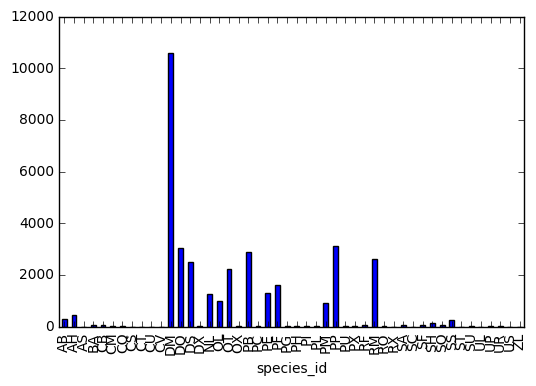

In [32]:
# Magic Function: make sure figures appear inline in Jupyter Notebook
%matplotlib inline

# create a quick bar chart
species_counts.plot(kind='bar'); # semi-colon to suppress text output

Look at how many **animals** were captured **in each plot**.

That is, we want **counts** grouped **by plot**.

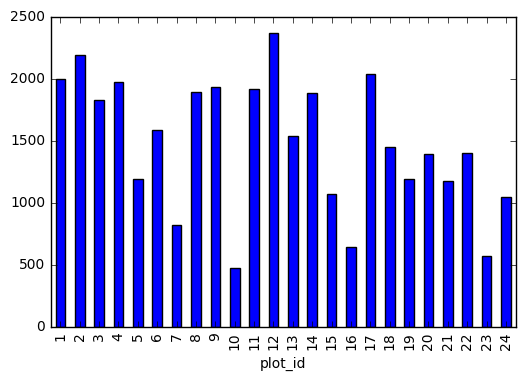

In [33]:
total_count = surveys_df['record_id'].groupby(surveys_df['plot_id']).nunique()

# let's plot that too
total_count.plot(kind='bar');

## Task Prep: Stacked Plots

Suppose we have some new data.

Recall we mentioned the Pandas **Series** before... basically a **1-column DataFrame**.

In [35]:
series_3_rows = pd.Series([1., 2., 3.], index=['a', 'b', 'c'])

In [36]:
series_3_rows

a    1.0
b    2.0
c    3.0
dtype: float64

In [37]:
series_4_rows = pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])

In [38]:
series_4_rows

a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64

Create a DataFrame by stitching these two series together as **columns in one big table**.

In [39]:
d = {'one': series_3_rows, 'two': series_4_rows}

In [40]:
mini_df = pd.DataFrame(d)

In [41]:
mini_df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


Let's create a **stacked plot**, i.e. one where

* we plot the **total value** for **each row**, and
* we **color sections** of each row's bar for the **proportion due to each column**.

Have a look...

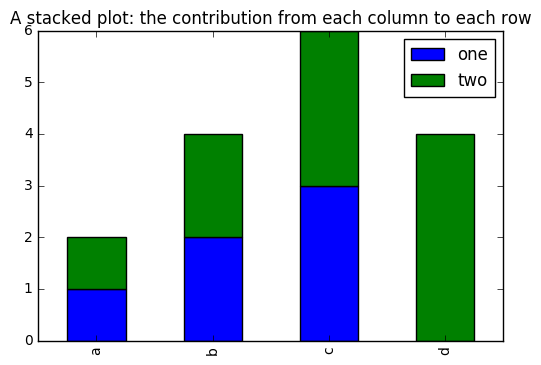

In [42]:
mini_df.plot(kind='bar', stacked=True, title="A stacked plot: the contribution from each column to each row")

### Exercise: Unstacking

Try unstacking the DataFrame via `.unstack()` to see what it gives you.

In [43]:
mini_df.unstack()

one  a    1.0
     b    2.0
     c    3.0
     d    NaN
two  a    1.0
     b    2.0
     c    3.0
     d    4.0
dtype: float64

It essentially isolates the original series once again, but now they're on top of one another in a DataFrame.

In [44]:
type(mini_df.unstack())

pandas.core.series.Series

### Exercises

1. Create a plot of average weight across all species per plot.
2. Create a plot of total males versus total females for the entire dataset.

## Task: Average Weight per Plot

### To-Do

> Create a stacked bar plot, with weight on the Y axis, and the stacked variable being sex. The plot should show **total weight** by **sex** for **each plot**.

### Logic

We want to

* group by **plot** and by **sex**
* then select **weight** and **sum**.

In [45]:
by_plot_sex = surveys_df.groupby(['plot_id', 'sex'])

In [46]:
plot_sex_count = by_plot_sex['weight'].sum()

In [47]:
plot_sex_count

plot_id  sex
1        F      38253.0
         M      59979.0
2        F      50144.0
         M      57250.0
3        F      27251.0
         M      28253.0
4        F      39796.0
         M      49377.0
5        F      21143.0
         M      23326.0
6        F      26210.0
         M      27245.0
7        F       6522.0
         M       6422.0
8        F      37274.0
         M      47755.0
9        F      44128.0
         M      48727.0
10       F       2359.0
         M       2776.0
11       F      34638.0
         M      43106.0
12       F      51825.0
         M      57420.0
13       F      24720.0
         M      30354.0
14       F      32770.0
         M      46469.0
15       F      12455.0
         M      11037.0
16       F       5446.0
         M       6310.0
17       F      42106.0
         M      48082.0
18       F      27353.0
         M      26433.0
19       F      11297.0
         M      11514.0
20       F      33206.0
         M      25988.0
21       F      15481.0
   

But to do our stacked plot, we want **`'M'` and `'F'` to be columns**.  So we **unstack**.

In [48]:
spc = plot_sex_count.unstack()

In [49]:
spc

sex,F,M
plot_id,,
1,38253.0,59979.0
2,50144.0,57250.0
3,27251.0,28253.0
4,39796.0,49377.0
5,21143.0,23326.0
6,26210.0,27245.0
7,6522.0,6422.0
8,37274.0,47755.0
9,44128.0,48727.0


That seems to have done it:

* for each row we can sum, then
* display the proportion of the sum contributed by each column.

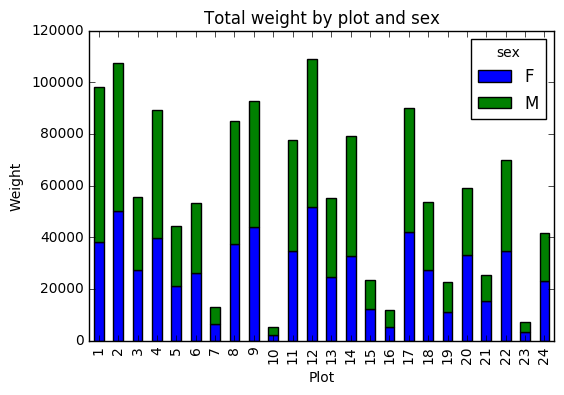

In [50]:
s_plot = spc.plot(kind='bar',stacked=True,title="Total weight by plot and sex")
s_plot.set_ylabel("Weight")
s_plot.set_xlabel("Plot")